<a href="https://colab.research.google.com/github/Hard-to-Cache/Hard-2-Cache/blob/main/sc24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pymupdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 71.6 MB/s eta 0:00:00


Saving sc24.zip to sc24.zip
✅ Extracted files: ['downloaded_pdfs']
📄 Found 10 PDFs.
✅ Reproducibility Scorecard for SC24 Papers:


,Code Availability,Dataset Availability,Documentation Quality,GPU Requirements,Computer Requirements,Result Reproducibility,Filename,Average Score
4,3,2,3,3,3,1,Application-Driven_Exascale_The_JUPITER_Benchm...,2.500000
7,3,2,3,3,3,0,Atlas_Hierarchical_Partitioning_for_Quantum_Ci...,2.333333
5,0,2,1,3,3,0,AmgT_Algebraic_Multigrid_Solver_on_Tensor_Core...,1.500000
3,1,1,1,3,3,0,Accelerating_Communication_in_Deep_Learning.pdf,1.500000
1,0,0,0,0,0,0,Accelerating_Distributed_DLRM_Training.pdf,0.000000
0,0,0,0,0,0,0,Accelerated_Kinetic_Monte_Carlo_Simulations.pdf,0.000000
2,0,0,0,0,0,0,APTMoE_Affinity-aware_Pipeline_Tuning_for_MoE_...,0.000000
6,0,0,0,0,0,0,Adaptive_Patching_for_High-resolution_Image_Se...,0.000000
8,0,0,0,0,0,0,Asynchronous_Distributed-Memory_Parallel_Algor...,0.000000
9,0,0,0,0,0,0,Accurate_and_Convenient_Energy_Measurements_fo...,0.000000


🏆 Top 3 Most Reproducible Papers:


,Filename,Average Score
4,Application-Driven_Exascale_The_JUPITER_Benchm...,2.500000
7,Atlas_Hierarchical_Partitioning_for_Quantum_Ci...,2.333333
5,AmgT_Algebraic_Multigrid_Solver_on_Tensor_Core...,1.500000


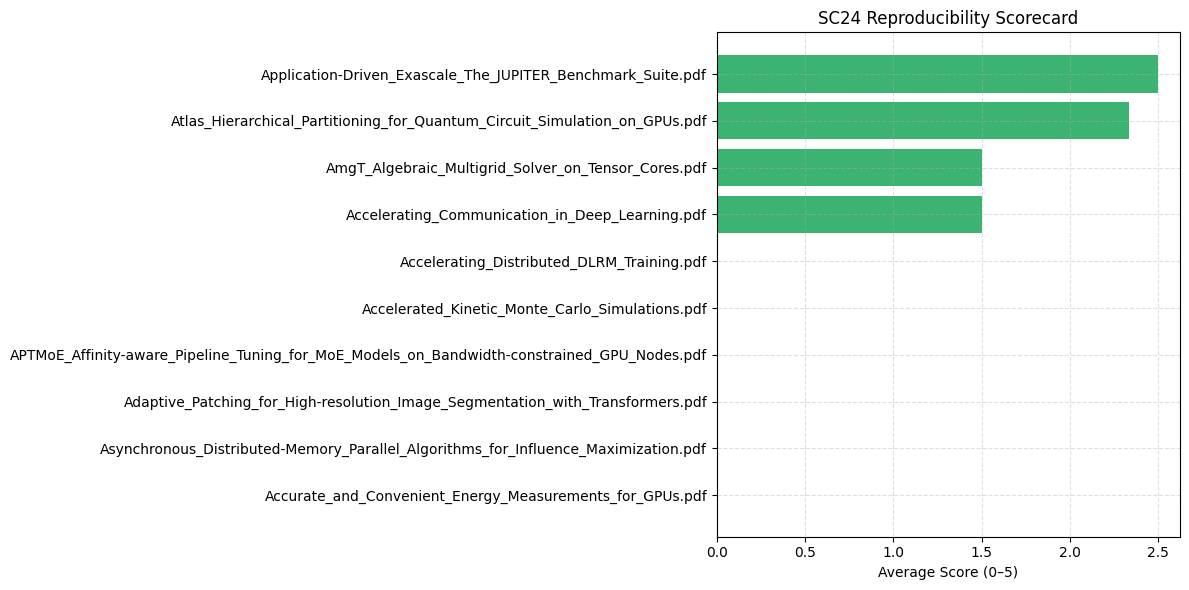

In [3]:
# 📦 Upload and score SC24.zip using reproducibility scorecard

# STEP 1: Upload and extract your ZIP
import zipfile, os
from google.colab import files
import fitz  # PyMuPDF
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Upload ZIP
uploaded = files.upload()
zip_name = list(uploaded.keys())[0]
extract_path = "sc24_pdfs" # 📦 Create a folder to hold extracted PDFs
os.makedirs(extract_path, exist_ok=True)

# Extract
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extracted files:", os.listdir(extract_path))  # shows the extracted files to confirm it worked

# STEP 2: Define scoring functions
def score_from_cues(text, cues):  # function to search for key cues (keywords) in text and gives a score
    text = text.lower()
    return min(5, sum(cue in text for cue in cues))

def score_paper(text):  # function that applies the scorecard across 6 reproducibility categories
    return {
        "Code Availability": score_from_cues(text, ["github.com", "code available", "open-source", "repository"]),
        "Dataset Availability": score_from_cues(text, ["dataset", "data available", "benchmark", "codesearchnet"]),
        "Documentation Quality": score_from_cues(text, ["readme", "setup", "installation", "documentation"]),
        "GPU Requirements": score_from_cues(text, ["gpu", "tesla", "nvidia", "cuda"]),
        "Computer Requirements": score_from_cues(text, ["cpu", "ram", "memory", "system specs"]),
        "Result Reproducibility": score_from_cues(text, ["reproducibility", "reproduce", "replication", "replicable"])
    }

# STEP 3: Score all PDFs
pdf_paths = list(Path(extract_path).rglob("*.pdf"))
print(f"📄 Found {len(pdf_paths)} PDFs.")

results = []

for pdf_path in pdf_paths: # loop through each pdf and score it
    try:
        with fitz.open(pdf_path) as doc:
            text = "".join([page.get_text() for page in doc])
        scores = score_paper(text)
        scores["Filename"] = pdf_path.name
        results.append(scores)
    except Exception as e:
        print(f"⚠️ Skipping {pdf_path.name}: {e}")

df = pd.DataFrame(results)  # convert results into a table (the dataframe)

# STEP 4: Show scorecard + chart
if df.empty:  # calulate average score per paper and show the full table
    print("⚠️ No PDFs were successfully scored.")
else:
    df["Average Score"] = df[[  # adds an average score column for summary
        "Code Availability", "Dataset Availability", "Documentation Quality",
        "GPU Requirements", "Computer Requirements", "Result Reproducibility"
    ]].mean(axis=1)

    df = df.sort_values("Average Score", ascending=False)

    # Show full scorecard
    print("✅ Reproducibility Scorecard for SC24 Papers:")
    display(df)

    # Top 3 papers
    print("🏆 Top 3 Most Reproducible Papers:") # displays the top 3 highest-scoring papers
    display(df.head(3)[["Filename", "Average Score"]])

    # Bar chart
    plt.figure(figsize=(12, 6)) # creates a horizontal bar chart for all papers
    plt.barh(df["Filename"], df["Average Score"], color="mediumseagreen")
    plt.xlabel("Average Score (0–5)")
    plt.title("SC24 Reproducibility Scorecard")
    plt.gca().invert_yaxis()
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()
